In [124]:
import requests
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




In [4]:
file_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"


# Baixando DataSet
## http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/

In [5]:
def baixarDataSet(nomeArquivo, file_url):
    dados = requests.get(file_url,stream= True)
    with open(nomeArquivo,"wb") as dadas: 
        for chunk in dados.iter_content(chunk_size=1024): 
             # writing one chunk at a time to csv file 
             if chunk: 
                 dadas.write(chunk) 

In [6]:
baixarDataSet("adult.csv", file_url)

# Lendo DataSet Adult e gerando DataFrame

In [141]:
df_adult = pd.read_csv("adult.csv",sep=",",header=None)
colunas = ["age",
"workclass",
"fnlwgt",
"education",
"education-num",
"marital-status",
"occupation",
"relationship",
"race",
"sex",
"capital-gain",
"capital-loss",
"hours-per-week",
"native-country",
"money"]
df_adult.columns= colunas
df_adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,money
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Visualizando dados

In [142]:
def plotarGráficoDeDispersao():
    f, axes = plt.subplots(2, 3,  figsize=(20, 10),sharex=False, sharey=False, squeeze= True)
    ax= sns.distplot(df_adult[colunas[0]], ax=axes[0,0])
    ax.set_title(colunas[0])

    ax1= sns.distplot(df_adult[colunas[2]],ax=axes[0,1])
    ax1.set_title(colunas[2])

    ax2= sns.distplot(df_adult[colunas[4]],ax=axes[0,2])
    ax2.set_title(colunas[4])

    ax3= sns.distplot(df_adult[colunas[10]],ax=axes[1,0])
    ax3.set_title(colunas[10])

    ax4= sns.distplot(df_adult[colunas[11]],ax=axes[1,1])
    ax4.set_title(colunas[11])

    ax5= sns.distplot(df_adult[colunas[12]],ax=axes[1,2])
    ax5.set_title(colunas[12])

  

## Gerando gráficos de dispersão dos dados contínuos

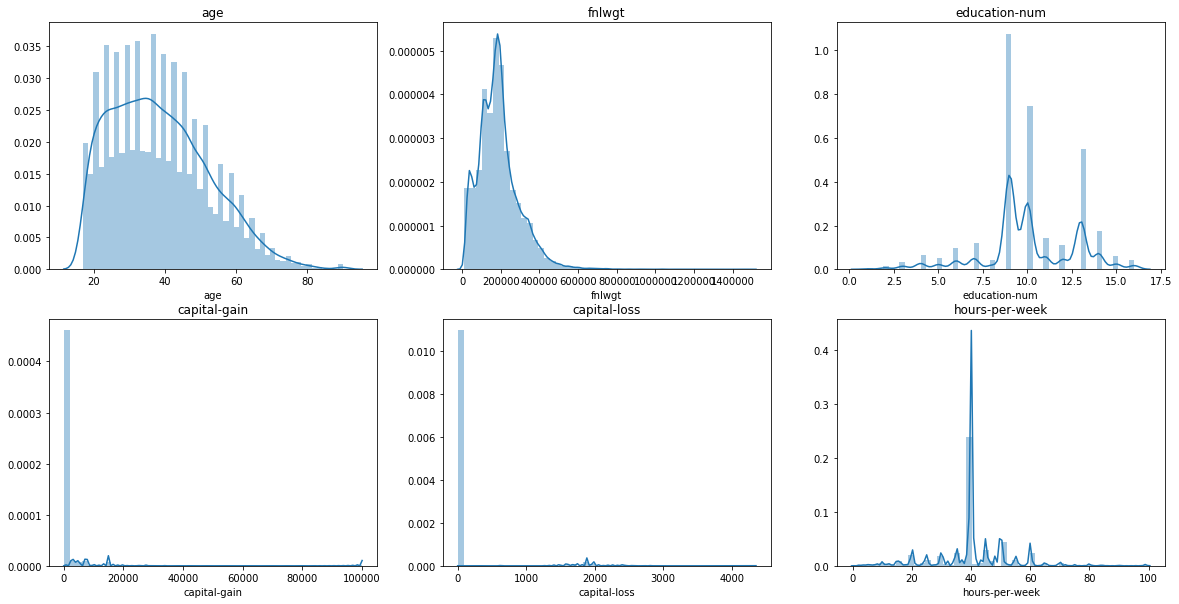

In [143]:
plotarGráficoDeDispersao()

# Tratando variáveis categóricas

In [74]:
def tratarVariaveisCat():
    previsores = df_adult.iloc[:, 0:14].values
    classe = df_adult.iloc[:, 14].values
    labelencoder_previsores = LabelEncoder()

    previsores[:, 1] = labelencoder_previsores.fit_transform(previsores[:, 1])
    previsores[:, 2] = labelencoder_previsores.fit_transform(previsores[:, 2])
    previsores[:, 3] = labelencoder_previsores.fit_transform(previsores[:, 3])
    previsores[:, 5] = labelencoder_previsores.fit_transform(previsores[:, 5])
    previsores[:, 6] = labelencoder_previsores.fit_transform(previsores[:, 6])
    previsores[:, 7] = labelencoder_previsores.fit_transform(previsores[:, 7])
    previsores[:, 8] = labelencoder_previsores.fit_transform(previsores[:, 8])
    previsores[:, 9] = labelencoder_previsores.fit_transform(previsores[:, 9])
    previsores[:, 13] = labelencoder_previsores.fit_transform(previsores[:, 13])

    classe = labelencoder_previsores.fit_transform(classe)
    
    return previsores,classe

# Gerando modelo de Floresta Randômica

In [75]:
def gerarModeloRandomFlorest():
    from sklearn.ensemble import RandomForestClassifier
    previcores,classe = tratarVariaveisCat()
    classificador = RandomForestClassifier(n_estimators=40, criterion='entropy',
    random_state=0, max_depth=5)
    from sklearn.model_selection import cross_val_score
    result = cross_val_score(classificador, previsores, classe, cv=10)
    print("Acurácia do modelo",result.mean().round(2)*100, "%")

In [76]:
gerarModeloRandomFlorest()

Acurácia do modelo 85.0 %
